## Correlação Cruzada - biblioteca OpenCV MatchTemplate

### Comparação entre a função de correlação cruzada e a de correlação cruzada normalizada da biblioteca open cv:

#### Template e imagem alvo:
- Leitura da imagem alvo em escala de cinza
- Cópia de uma região de interesse da imagem alvo, que será o template
- Ambos template e imagem alvo devem ser convertidos para array
- obtenção das dimensões do template, para desenhar um retangulo no ponto de localização
- cálculo da correlação cruzada, passando a imagem alvo, o template e o método cv2.TM_CCOEFF da biblioteca
- cálculo da correlação cruzada normalizada, passando a imagem alvo, o template e o método cv2.TM_CCOEFF_NORMED da biblioteca

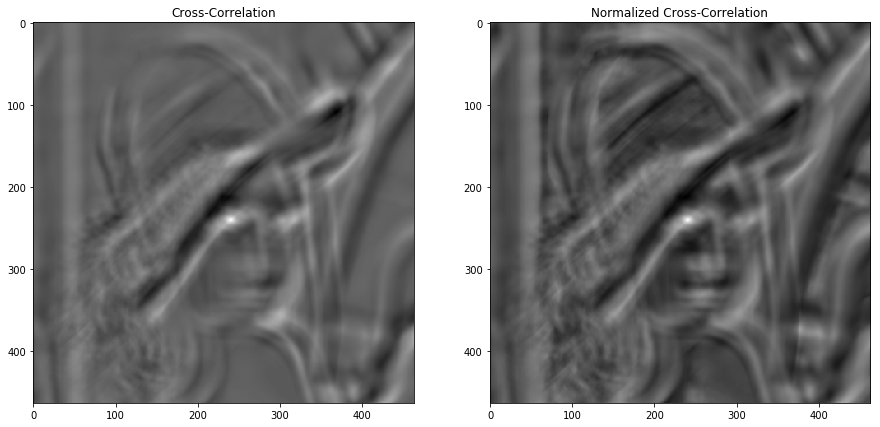

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../figures/lena_greyscale.png',0)
img2 = cv2.imread('../figures/lena_greyscale.png',0)
arr = np.asarray(img)
arr2 = np.asarray(img2)
template = np.copy(arr[240:290, 240:290])                         # recorte da imagem para obter o template
  
w, h = template.shape[::-1]                                       # Obtenção da dimensão do template
res_CC = cv2.matchTemplate(arr,template,cv2.TM_CCOEFF)            # Cross Correlation
res_NCC = cv2.matchTemplate(arr2,template,cv2.TM_CCOEFF_NORMED)    # Normalized cross crorrelation
plt.figure(figsize=(15,10))
plt.subplot(121),plt.title('Cross-Correlation'), plt.imshow(res_CC,cmap = 'gray')
plt.subplot(122),plt.title('Normalized Cross-Correlation'), plt.imshow(res_NCC,cmap = 'gray')
plt.show()

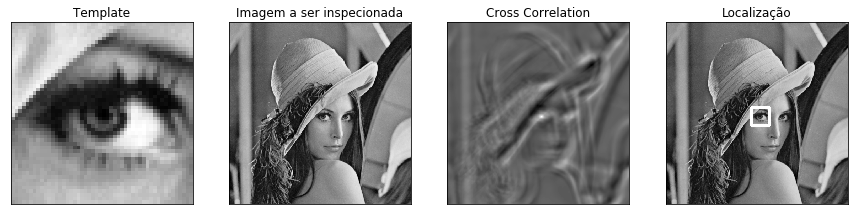

Valor máximo CC 4909979.0
Valor mínimo CC -3094247.5


In [3]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res_CC)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

plt.figure(figsize=(15,10))

plt.subplot(141),plt.imshow(template,cmap = 'gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])

plt.subplot(142),plt.imshow(arr,cmap = 'gray')
plt.title('Imagem a ser inspecionada'), plt.xticks([]), plt.yticks([])

plt.subplot(143),plt.imshow(res_CC,cmap = 'gray')
plt.title('Cross Correlation'), plt.xticks([]), plt.yticks([])

cv2.rectangle(img,top_left, bottom_right, 255, 8)
plt.subplot(144),plt.imshow(img,cmap = 'gray')
plt.title('Localização'), plt.xticks([]), plt.yticks([])
plt.show()
print('Valor máximo CC',max_val)
print('Valor mínimo CC',min_val)

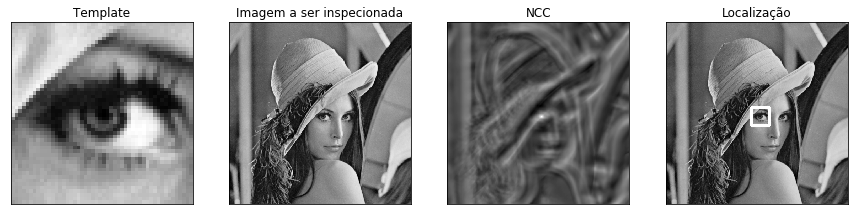

Valor máximo NCC 1.0
Valor mínimo NCC -0.521093487739563


In [4]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res_NCC)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

plt.figure(figsize=(15,10))
plt.subplot(141),plt.imshow(template,cmap = 'gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])

plt.subplot(142),plt.imshow(arr2,cmap = 'gray')
plt.title('Imagem a ser inspecionada'), plt.xticks([]), plt.yticks([])

plt.subplot(143),plt.imshow(res_NCC,cmap = 'gray')
plt.title('NCC'), plt.xticks([]), plt.yticks([])

cv2.rectangle(img2,top_left, bottom_right, 255, 8)
plt.subplot(144),plt.imshow(img2,cmap = 'gray')
plt.title('Localização'), plt.xticks([]), plt.yticks([])
plt.show()
print('Valor máximo NCC',max_val)
print('Valor mínimo NCC',min_val)

In [6]:
%timeit res_CC


23.6 ns ± 2.51 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [41]:
%timeit res_NCC

19.4 ns ± 0.128 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


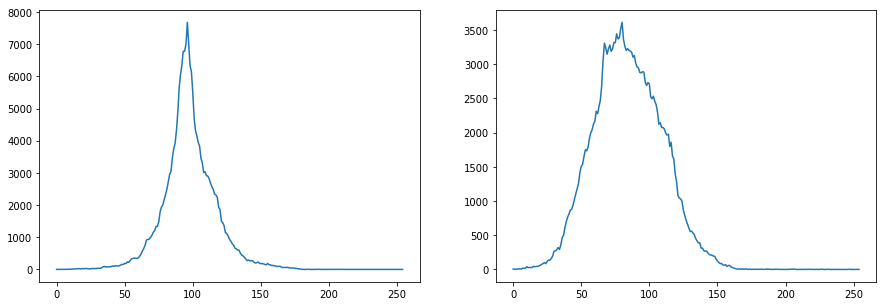

In [5]:
hist1,g1 = np.histogram(res_CC,bins=255)
hist2,g2 = np.histogram(res_NCC,bins=255)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist1)
plt.subplot(1,2,2)
plt.plot(hist2)
plt.show()

(0, 10000)

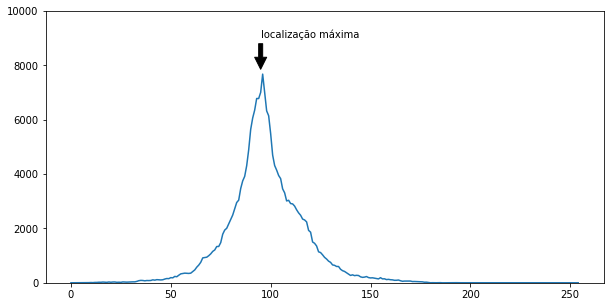

In [89]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(hist1)
ax.annotate('localização máxima', xy=(95,7800),xytext=(95,9000), arrowprops=dict(facecolor='black',shrink=0.05),)
ax.set_ylim(0,10000)

(0, 5000)

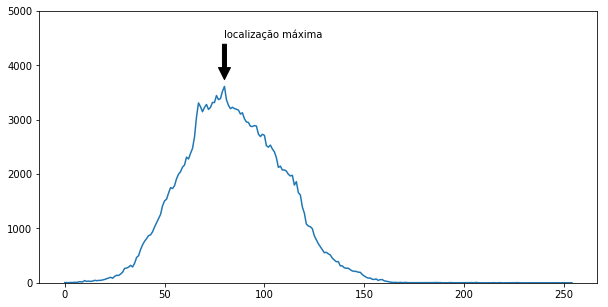

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.plot(hist2)
ax.annotate('localização máxima', xy=(80,3700),xytext=(80,4500), arrowprops=dict(facecolor='black',shrink=0.05),)
ax.set_ylim(0,5000)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy import signal

cell = Image.open('../figures/llc.jpg').convert("L") # Salvando imagem em tons de cinza
cell.save('../figures/llc_grayScale.tif') 

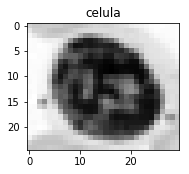

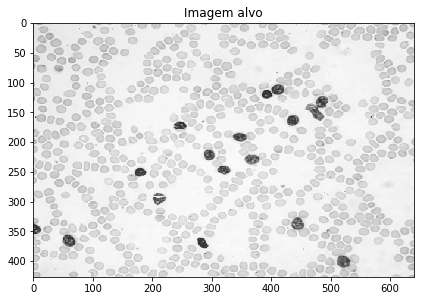

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

#img = Image.open('../figures/CorteTecido.jpg').convert("L") # Salvando imagem em tons de cinza
#img.save('../figures/CorteTecido_grayScale.tif') 

cell = mpimg.imread('../figures/llc_grayScale.tif')
a = np.asarray(cell)
template2 = np.copy(a[353:378, 45:75])  

#plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('celula')
plt.imshow(template2, cmap='gray')
#plt.axis(off)

plt.figure(figsize=(15,10))
plt.subplot(1,2,2)
plt.title('Imagem alvo')
plt.imshow(a, cmap='gray')
plt.show()

In [59]:
#arr = arr - arr.mean()
#template2 -= template2.mean()
corr = signal.correlate2d(a, template2, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # Encontrar a correspondencia: Converte um índice simples ou uma matriz de índices simples em uma tupla de matrizes de coordenadas
print(np.argmax(corr))
print(corr.shape)
print(y,x)

90
(427, 640)
0 90


C:\Users\le-rc\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


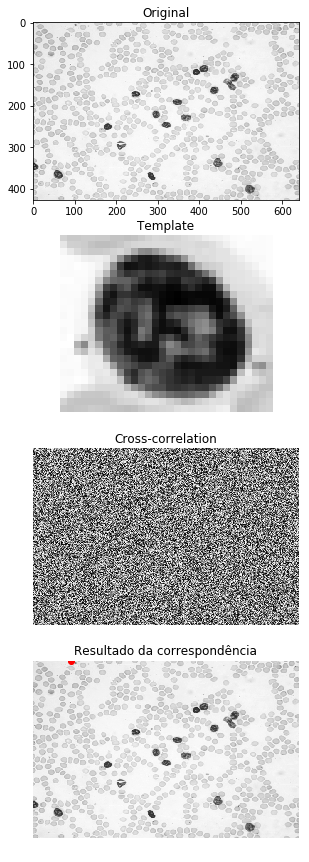

In [60]:
fig, (ax_orig, ax_template, ax_corr, ax_result) = plt.subplots(4, 1, figsize=(6, 15))
ax_orig.imshow(a, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()

ax_template.imshow(template2, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()

ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()

ax_result.imshow(a, cmap='gray')
ax_result.set_title('Resultado da correspondência')
ax_result.set_axis_off()

ax_result.plot(x, y, 'ro')
fig.show()

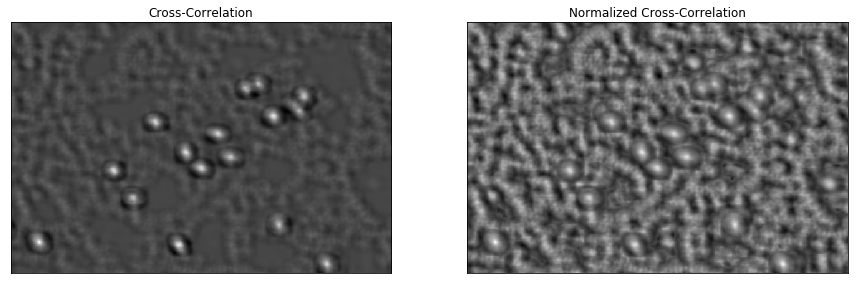

In [87]:
cell = cv2.imread('../figures/llc_grayScale.tif',0)
cell2 = cv2.imread('../figures/llc_grayScale.tif',0)
a = np.asarray(cell)
a2 = np.asarray(cell2)
template2 = np.copy(cell[353:378, 45:75])                           # cropped da imagem para obtero template
  
w2, h2 = template2.shape[::-1]                                       # Obtenção da dimensão do template
res_CC2 = cv2.matchTemplate(cell,template2,cv2.TM_CCOEFF)            # Cross Correlation
res_NCC2 = cv2.matchTemplate(cell2,template2,cv2.TM_CCOEFF_NORMED)    # Normalized cross crorrelation
plt.figure(figsize=(15,10))
plt.subplot(121),plt.title('Cross-Correlation'), plt.imshow(res_CC2,cmap = 'gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.title('Normalized Cross-Correlation'), plt.imshow(res_NCC2,cmap = 'gray'),plt.xticks([]), plt.yticks([])
plt.show()

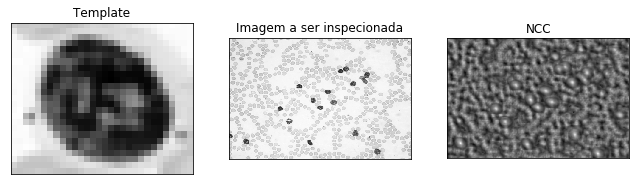

Valor máximo CC 2419303.0
Valor mínimo CC -914813.5
Valor máximo NCC 1.0
Valor mínimo NCC -0.6637192964553833


In [77]:
min_val1, max_val1, min_loc1, max_loc1 = cv2.minMaxLoc(res_CC2)
min_val2, max_val2, min_loc2, max_loc2 = cv2.minMaxLoc(res_NCC2)

top_left2 = max_loc2
bottom_right2 = (top_left2[0] + w2, top_left2[1] + h2)

plt.figure(figsize=(15,10))
plt.subplot(141),plt.imshow(template2,cmap = 'gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])

plt.subplot(142),plt.imshow(cell2,cmap = 'gray')
plt.title('Imagem a ser inspecionada'), plt.xticks([]), plt.yticks([])

plt.subplot(143),plt.imshow(res_NCC2,cmap = 'gray')
plt.title('NCC'), plt.xticks([]), plt.yticks([])


plt.show()
print('Valor máximo CC',max_val1)
print('Valor mínimo CC',min_val1)
print('Valor máximo NCC',max_val2)
print('Valor mínimo NCC',min_val2)

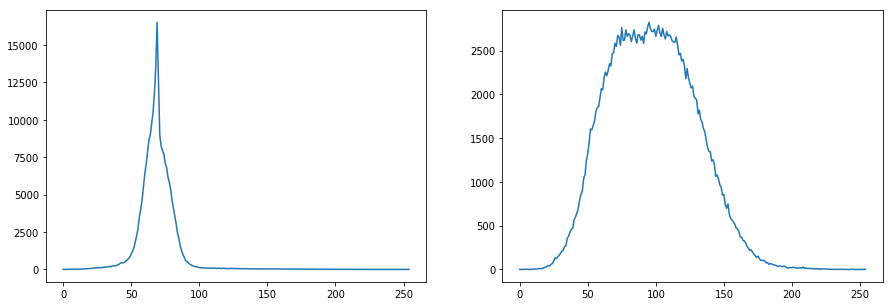

In [62]:
hist3,g3 = np.histogram(res_CC2,bins=255)
hist4,g4 = np.histogram(res_NCC2,bins=255)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist3)
plt.subplot(1,2,2)
plt.plot(hist4)
plt.show()

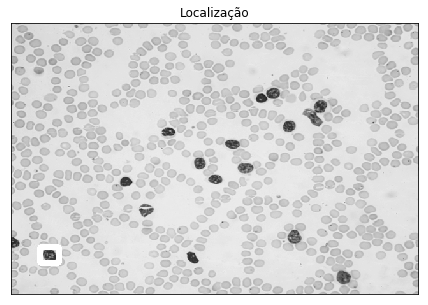

In [63]:
plt.figure(figsize=(10,5))
cv2.rectangle(cell2,top_left2, bottom_right2, 255, 8)
plt.imshow(cell2,cmap = 'gray')
plt.title('Localização'), plt.xticks([]), plt.yticks([])

plt.show()

### O Objetivo é localizar multiplas correspondências do modelo dentro da imagem original
- Atribuição de um threshold - limiar o qual imagnina-se que os objetos podem corresponder,
- Busca todos os pontos de localização que estão acima do limar e armazena em um array de localização
- Através de um loop percorre todo o array de localização acima, marcando com um retangulo na imagem original, cada localização encontrada.
- exibe a imagem original com as marcações

#### Conclusão essa tecnica não mostrou-se totalmente eficiente, pois os objetos da imagem teria que ser bem parecido com o que está se buscando. Talvez tenha que combinar o template matching de CC ou NCC com outra técnica.

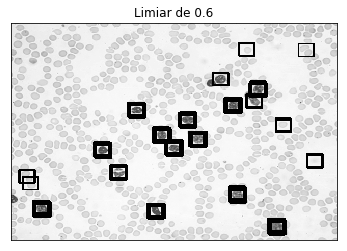

In [84]:
threshold = 0.6                                                       # Atribuição de um limiar
loc = np.where( res_NCC2 >= threshold)                                # Buscar os ontos de correspondencia de acordo com o limite estabelecido

for pt in zip(*loc[::-1]):
    cv2.rectangle(cell2, pt, (pt[0] + w2, pt[1] + h2), (0,255,255), 2) # Identificação dos pontos de correpondência

plt.title('Limiar de 0.6'), plt.xticks([]), plt.yticks([])
plt.imshow(cell2, cmap='gray')

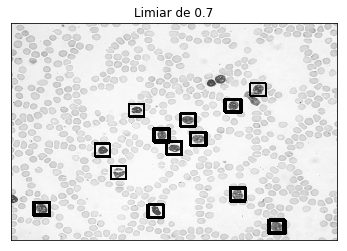

In [86]:
threshold = 0.7
loc = np.where( res_NCC2 >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(cell2, pt, (pt[0] + w2, pt[1] + h2), (0,255,255), 2)

plt.title('Limiar de 0.7'), plt.xticks([]), plt.yticks([])
plt.imshow(cell2, cmap='gray')
